<a href="https://colab.research.google.com/github/saira83/road_accidents_clasification/blob/main/Road_Traffic_Accidents_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Road_traffic_accidends_classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Load the dataset
data = pd.read_csv("/content/RTA Dataset.csv")

In [ ]:
# Explore the dataset
print(data.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
# are there duplicate values?
data.duplicated().sum()

0

In [ ]:
# are there any missing values?
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
data.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(12316, 32)

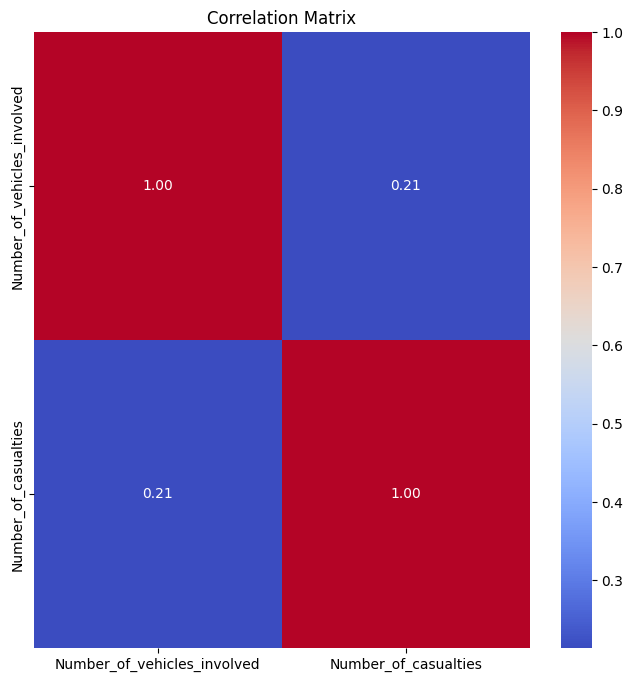

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: >

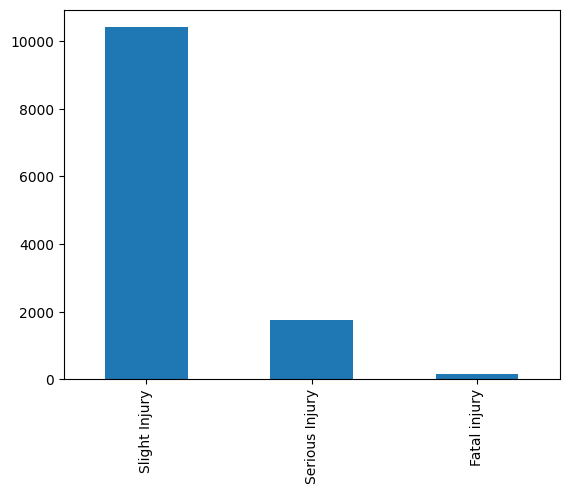

In [ ]:
# catagorical data
#sns.countplot(data['Accident_severity'])
data['Accident_severity'].value_counts().plot(kind='bar')

<Axes: >

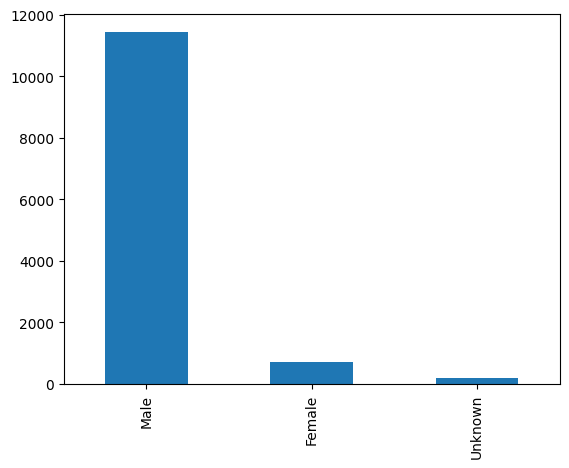

In [ ]:
data['Sex_of_driver'].value_counts().plot(kind='bar')

(array([4271.,    0., 4087.,    0.,    0.,  825.,    0., 1585.,    0.,
        1548.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

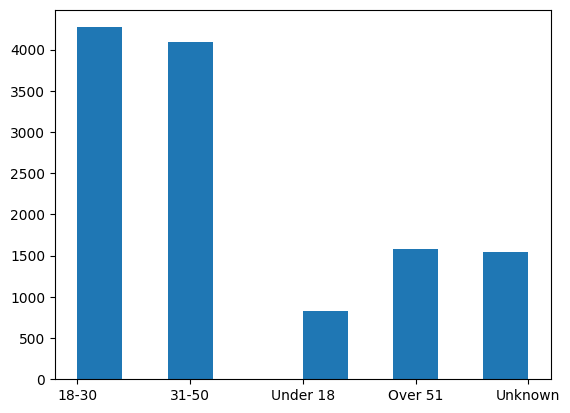

In [ ]:
plt.hist(data['Age_band_of_driver'])

<Axes: ylabel='Casualty_class'>

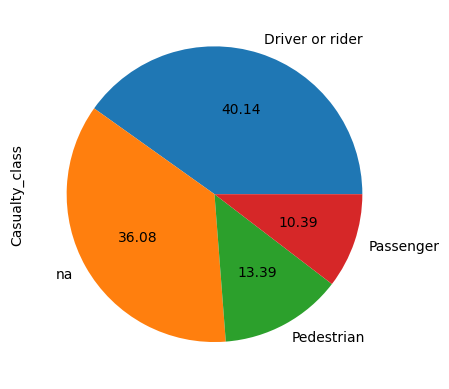

In [ ]:
data['Casualty_class'].value_counts().plot(kind='pie', autopct='%.2f')

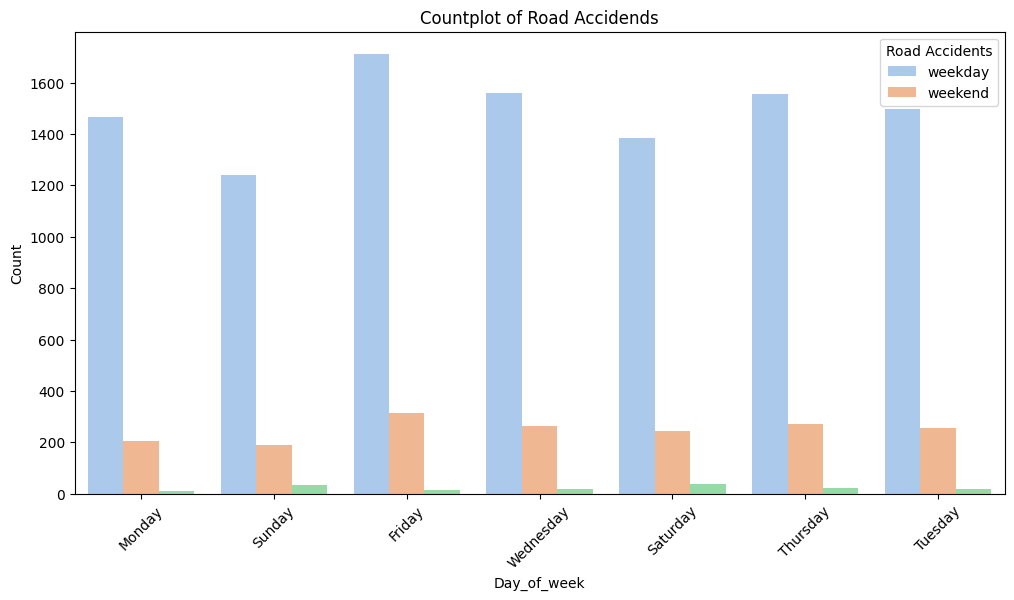

In [ ]:
# Create a countplot of 'Accident_severity' across 'Day_of_week'
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_week', hue='Accident_severity', data=data, palette='pastel')
plt.title('Countplot of Road Accidends')
plt.xlabel('Day_of_week')
plt.ylabel('Count')
plt.legend(title='Road Accidents', labels=['weekday', 'weekend'])
plt.xticks(rotation=45)
plt.show()

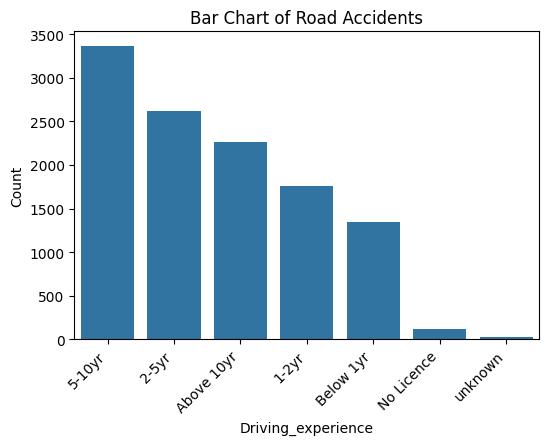

In [ ]:
# Create a bar chart for 'Driving_experience'
plt.figure(figsize=(6, 4))
sns.countplot(x='Driving_experience', data=data, order=data['Driving_experience'].value_counts().index)
plt.title('Bar Chart of Road Accidents')
plt.xlabel('Driving_experience')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-32-e94b705ec1b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


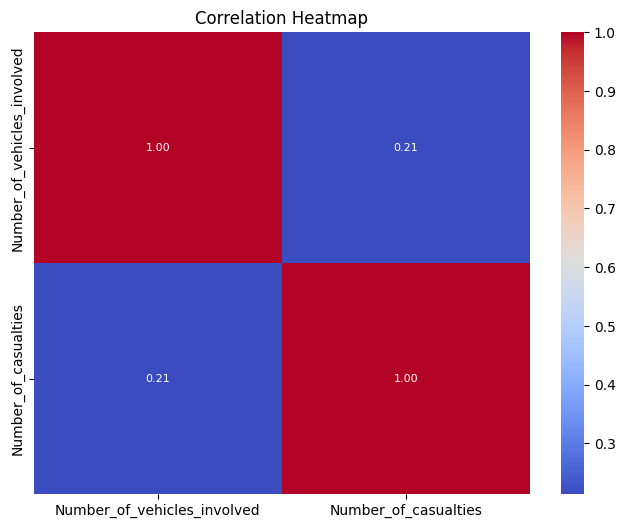

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'fontsize': 8})
plt.title('Correlation Heatmap')
plt.show()


No features with VIF > 5, multicollinearity not detected.


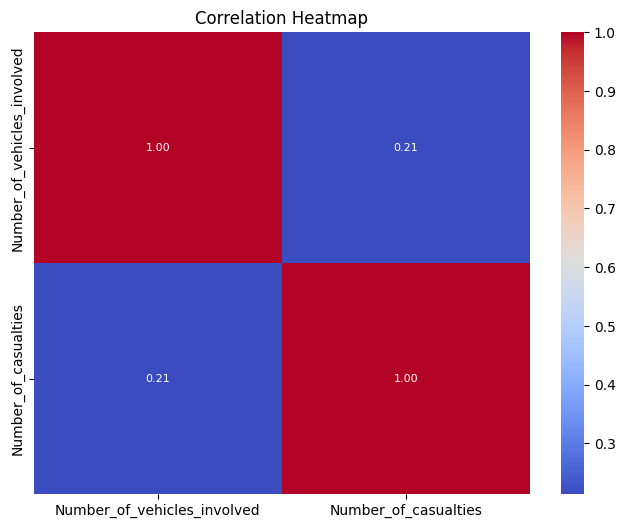

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get numerical feature columns
num_features = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
vif_data["VIF"] = [variance_inflation_factor(data[num_features].values, i) for i in range(len(num_features))]

# Display features with VIF greater than a threshold (e.g., 5)
high_vif_features = vif_data[vif_data['VIF'] > 5]
if not high_vif_features.empty:
    print("Features with VIF > 5:")
    print(high_vif_features)
    print("Consider dropping one of these highly collinear features.")
else:
    print("No features with VIF > 5, multicollinearity not detected.")

# Create heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'fontsize': 8})
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

<Axes: ylabel='Time'>

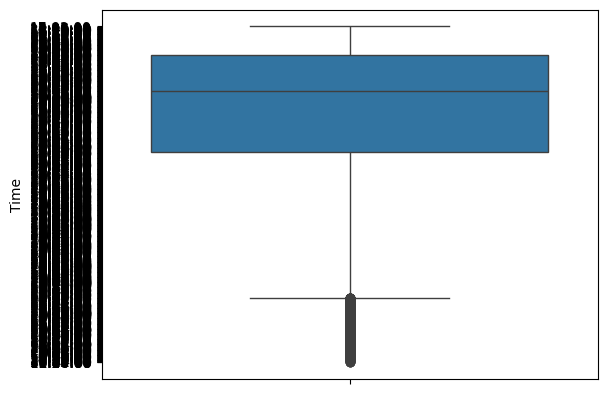

In [ ]:
sns.boxplot(data['Time'])

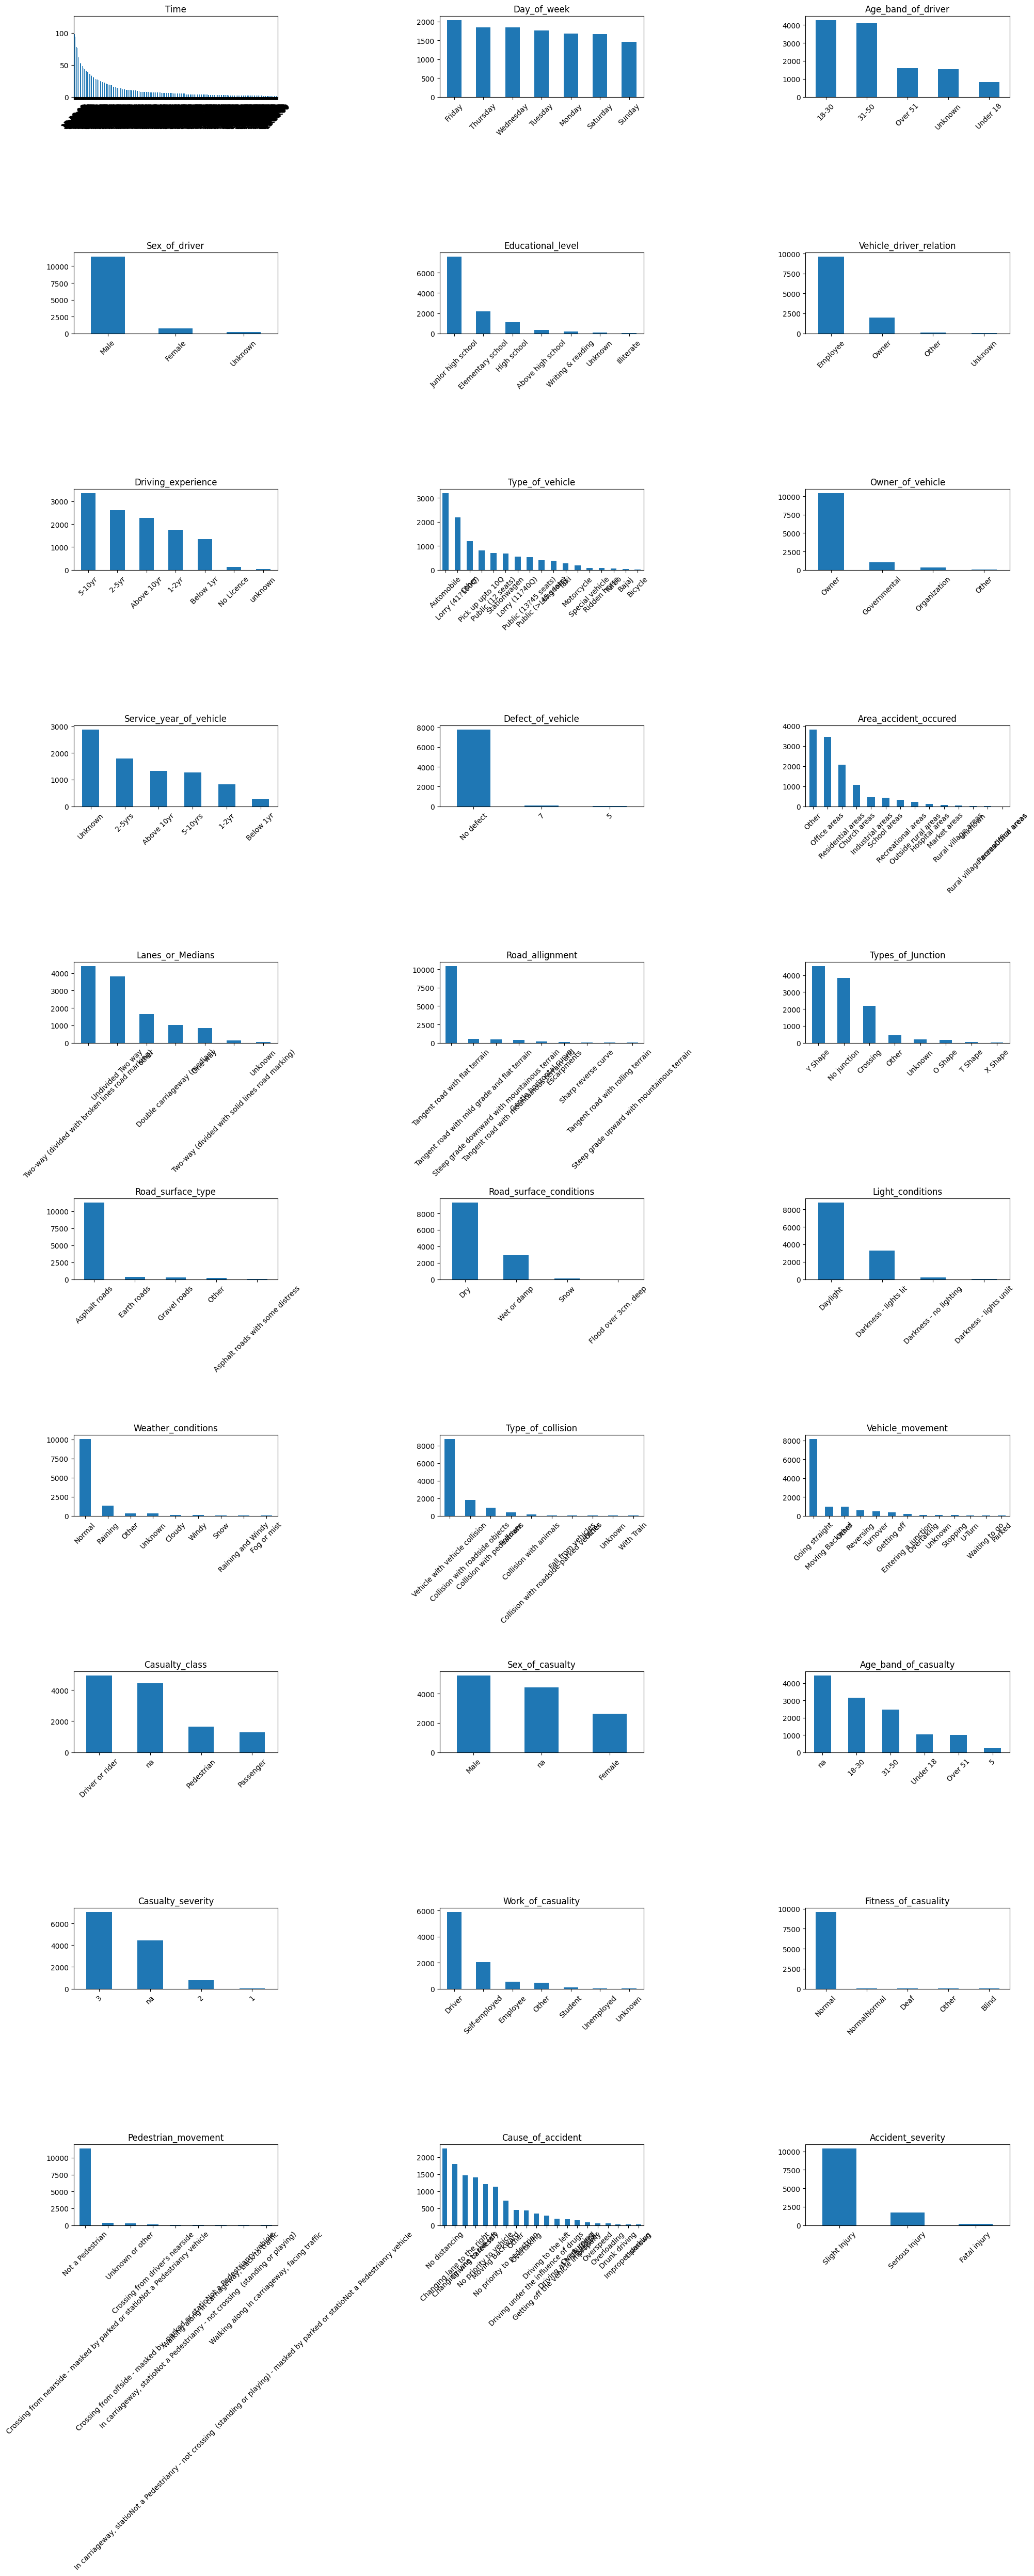

In [ ]:
# Plot bar chart for each categorical column
num_columns = len(data.select_dtypes(include=['object']).columns)
num_rows = (num_columns + 2) // 3  # Ensure at least 3 columns per row
plt.figure(figsize=(20, 5 * num_rows))  # Increase figure height based on the number of rows
for i, column in enumerate(data.select_dtypes(include=['object']).columns):  # Select categorical columns
    plt.subplot(num_rows, 3, i + 1)  # Adjust subplot dimensions based on the number of columns
    data[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [ ]:
#data = data.drop(['Owner_of_vehicle'], axis=1)
data = data.drop(['Owner_of_vehicle'], axis=1)
data = data.drop(['Age_band_of_casualty'], axis=1)
data = data.drop(['Work_of_casuality'], axis=1)
data = data.drop(['Fitness_of_casuality'], axis=1)

KeyError: "['Owner_of_vehicle'] not found in axis"

In [ ]:
# Handle missing values in categorical columns

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputed_data = imputer.fit_transform(data)

imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(data)

# Forward fill
df_filled = data.fillna(method='ffill')

# Backward fill
df_filled = data.fillna(method='bfill')

In [ ]:

imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputed_data = imputer.fit_transform(data)

imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(data)

In [ ]:
# Convert categorical variables into 'dummy' or indicator variables
Age_band_of_driver = pd.get_dummies(['Age_band_of_driver'], drop_first = True) # drop_first prevents multi-collinearity
Sex_of_driver= pd.get_dummies(['Sex_of_driver'], drop_first = True)
Educational_level= pd.get_dummies(['Educational_level'], drop_first = True)
Vehicle_driver_relation= pd.get_dummies(['Vehicle_driver_relation'], drop_first = True)
Driving_experience= pd.get_dummies(['Driving_experience'], drop_first = True)
Type_of_vehicle= pd.get_dummies(['Type_of_vehicle'], drop_first = True)
Service_year_of_vehicle= pd.get_dummies(['Service_year_of_vehicle'], drop_first = True)
Defect_of_vehicle= pd.get_dummies(['Defect_of_vehicle'], drop_first = True)
Area_accident_occured= pd.get_dummies(['Area_accident_occured'], drop_first = True)
Lanes_or_Medians= pd.get_dummies(['Lanes_or_Medians'], drop_first = True)
Road_allignment= pd.get_dummies(['Road_allignment'], drop_first = True)
Types_of_Junction= pd.get_dummies(['Types_of_Junction'], drop_first = True)
Road_surface_type= pd.get_dummies(['Road_surface_type'], drop_first = True)
Road_surface_conditions= pd.get_dummies(['Road_surface_conditions'], drop_first = True)
Light_conditions= pd.get_dummies(['Light_conditions'], drop_first = True)
Weather_conditions= pd.get_dummies(['Weather_conditions'], drop_first = True)
Type_of_collision= pd.get_dummies(['Type_of_collision'], drop_first = True)
Number_of_vehicles_involved= pd.get_dummies(['Number_of_vehicles_involved'], drop_first = True)
Number_of_casualties= pd.get_dummies(['Number_of_casualties'], drop_first = True)
Vehicle_movement= pd.get_dummies(['Vehicle_movement'], drop_first = True)
Sex_of_casualty= pd.get_dummies(['Sex_of_casualty'], drop_first = True)
Casualty_severity= pd.get_dummies(['Casualty_severity'], drop_first = True)
Pedestrian_movement= pd.get_dummies(['Pedestrian_movement'], drop_first = True)
Cause_of_accident= pd.get_dummies(['Cause_of_accident'], drop_first = True)
Accident_severity= pd.get_dummies(['Accident_severity'], drop_first = True)

In [ ]:
# Add new dummy columns to data frame
full_data = pd.concat([data,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience, Type_of_vehicle, Service_year_of_vehicle,Defect_of_vehicle, Area_accident_occured,Lanes_or_Medians,Road_allignment, Types_of_Junction, Road_surface_type,Road_surface_conditions,Light_conditions, Weather_conditions,Type_of_collision, Vehicle_movement, Sex_of_casualty,Casualty_severity, Pedestrian_movement,Cause_of_accident,Accident_severity], axis = 1)
full_data.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Above 10yr,No defect,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),5-10yrs,No defect,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),NaN,No defect,...,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),NaN,No defect,...,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,5-10yrs,No defect,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data)  # This will convert categorical variables into binary columns

# Display the encoded data
print(data_encoded.head())

   Number_of_vehicles_involved  Number_of_casualties  Time_0:01:00  \
0                            2                     2             0   
1                            2                     2             0   
2                            2                     2             0   
3                            2                     2             0   
4                            2                     2             0   

   Time_0:02:00  Time_0:03:00  Time_0:04:00  Time_0:06:00  Time_0:08:00  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Time_0:09:00  Time_0:10:00  ...  Cause_of_accident_Other  \
0             0             0  ...                        0   
1 

In [ ]:
# Define columns with numeric and non-numeric data
numeric_features = ['Number_of_vehicles_involved',
       'Number_of_casualties']
non_numeric_features = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle',  'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty',  'Casualty_severity',
        'Pedestrian_movement',
       'Cause_of_accident']

# Define preprocessing steps for numeric and non-numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

# Apply preprocessing steps to respective columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', non_numeric_transformer, non_numeric_features)])

# Fit the preprocessor to your data
pre_process = preprocessor.fit(X)

# Transform your data
X_transform = pre_process.transform(X)

In [ ]:
# Assuming you have already loaded your dataset into a DataFrame called 'data'
# Assuming 'target_column' is the name of the target variable column in your dataset

# Define X (features) and y (target)
X = data.drop(columns=['Accident_severity'])  # Features
y = data['Accident_severity']  # Target

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [ ]:
X_train.shape
X_train

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
5110,8:40:00,Wednesday,Under 18,Male,Junior high school,NaN,Below 1yr,Taxi,Below 1yr,No defect,...,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Male,3,Not a Pedestrian,No distancing
383,18:35:00,Saturday,31-50,Male,Junior high school,Employee,5-10yr,Other,NaN,No defect,...,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Not a Pedestrian,Overtaking
3256,17:30:00,Monday,18-30,Male,Above high school,Employee,Above 10yr,Lorry (41?100Q),NaN,No defect,...,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Not a Pedestrian,Changing lane to the right
10989,16:32:00,Monday,18-30,Male,High school,Employee,Above 10yr,Stationwagen,Unknown,No defect,...,Raining,Collision with roadside objects,2,1,Moving Backward,Driver or rider,Male,3,Not a Pedestrian,Changing lane to the left
12239,7:40:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Stationwagen,Unknown,7,...,Normal,NaN,3,1,Going straight,Driver or rider,Male,3,Not a Pedestrian,Driving carelessly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,14:40:00,Saturday,18-30,Unknown,Junior high school,Employee,1-2yr,Long lorry,1-2yr,No defect,...,Normal,Unknown,3,1,Going straight,na,na,na,Not a Pedestrian,Changing lane to the right
5695,16:38:00,Thursday,31-50,Male,Elementary school,Employee,NaN,Other,Unknown,No defect,...,Normal,Vehicle with vehicle collision,1,1,Going straight,Driver or rider,Male,3,Not a Pedestrian,No priority to vehicle
8006,18:40:00,Sunday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,2-5yrs,No defect,...,Normal,Vehicle with vehicle collision,3,2,Going straight,na,na,na,Not a Pedestrian,Driving carelessly
1361,18:15:00,Sunday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),NaN,No defect,...,Normal,Vehicle with vehicle collision,1,1,Getting off,Driver or rider,Male,3,Not a Pedestrian,No priority to pedestrian


In [ ]:
X_test.shape
X_test

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
4989,5:50:00,Friday,Unknown,Female,Junior high school,Employee,Below 1yr,Stationwagen,Unknown,No defect,...,Normal,Collision with pedestrians,2,1,Turnover,Pedestrian,Female,3,Not a Pedestrian,Changing lane to the left
7607,12:00:00,Sunday,18-30,Male,Unknown,Other,NaN,Automobile,Above 10yr,NaN,...,Normal,Vehicle with vehicle collision,3,4,Going straight,Passenger,Female,3,Not a Pedestrian,Driving under the influence of drugs
10144,7:50:00,Wednesday,18-30,Male,Elementary school,Employee,1-2yr,Long lorry,Unknown,No defect,...,Normal,Vehicle with vehicle collision,2,1,Turnover,na,na,na,Not a Pedestrian,Moving Backward
7812,20:30:00,Friday,31-50,Male,Junior high school,Owner,5-10yr,Pick up upto 10Q,Unknown,No defect,...,Unknown,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,3,Crossing from offside - masked by parked or s...,No priority to pedestrian
4274,14:30:00,Monday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),2-5yrs,NaN,...,Unknown,Collision with roadside objects,2,1,Getting off,Pedestrian,Male,3,Unknown or other,Moving Backward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5890,14:30:00,Wednesday,Unknown,Male,Elementary school,Owner,Above 10yr,Automobile,1-2yr,No defect,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,3,Not a Pedestrian,No distancing
3127,11:14:00,Tuesday,Over 51,Male,Junior high school,Employee,2-5yr,Public (13?45 seats),NaN,NaN,...,Normal,Vehicle with vehicle collision,2,1,Going straight,Passenger,Female,3,Not a Pedestrian,Changing lane to the left
4273,8:56:00,Sunday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,2-5yrs,NaN,...,Normal,Vehicle with vehicle collision,1,1,Turnover,Pedestrian,Male,3,Unknown or other,No distancing
7081,14:35:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Unknown,NaN,...,Normal,Collision with pedestrians,3,3,Stopping,Driver or rider,Male,3,Not a Pedestrian,No priority to vehicle


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_test = X_test.apply(le.fit_transform)

# **LOGISTIC REGRESSION
Model Training & Evaluation**

In [ ]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(X_train, y_train)

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(X_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 84.74 %


# **DECISION TREE
Model Training & Evaluation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(X_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(X_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 74.35 %


# RANDOM FOREST
 Model Training & Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(X_train, y_train)

Random Forest Classifier


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(X_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 84.86 %


# **GRADIENT BOOSTING
Model Training & Evaluation**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(X_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(X_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 84.94 %


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 84.94
2. Random Forest Classifier: 84.86
3. Logistic Regression: 84.74
4. Decision Tree Classifier: 74.35


In [ ]:
# Step 4: Model Evaluation
from sklearn.metrics import f1_score

# Predict on test data
rf_pred = rfc.predict(X_test)
dtree_pred = Dtree.predict(X_test)
gb_pred = gbc.predict(X_test)
log_reg = log_reg.predict(X_test)



In [ ]:
# Evaluate F1-score
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
svm_f1 = f1_score(y_test, dtree_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
log_f1 = f1_score(y_test, log_reg, average='weighted')
print("Random Forest F1-score:", rf_f1)
print("Dtree F1-score:", svm_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("logistic regression F1-score:", log_f1)

Random Forest F1-score: 0.7818341201378602
Dtree F1-score: 0.750283474233171
Gradient Boosting F1-score: 0.7852148464084306
logistic regression F1-score: 0.7774062492867414


<ipython-input-95-433abc8ff206>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=df_f1_scores, palette='viridis')


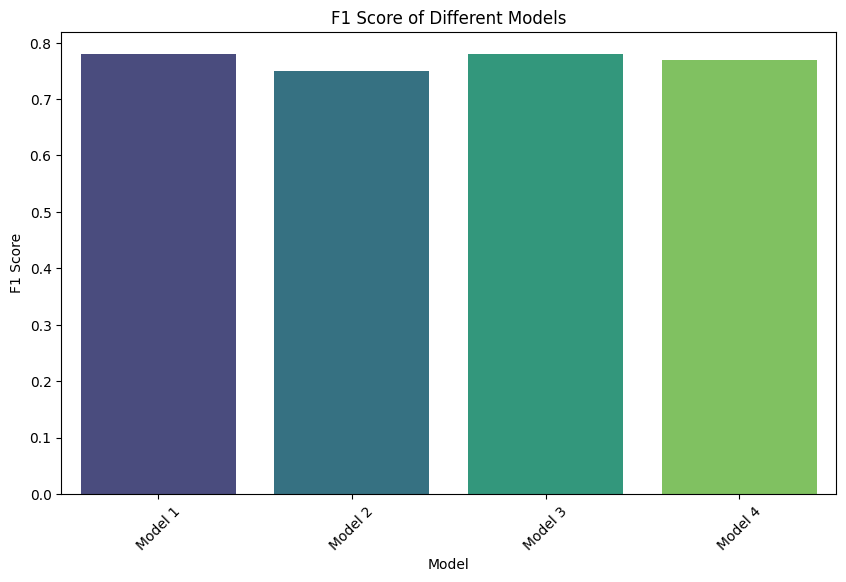

In [ ]:

# Assuming you have calculated F1 scores and stored them in a dictionary
f1_scores = {
    'Model 1': 0.78,
    'Model 2': 0.75,
    'Model 3': 0.78,
    'Model 4': 0.77,
    # Add more models as needed
}

# Convert dictionary to a DataFrame
df_f1_scores = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])

# Plot F1 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=df_f1_scores, palette='viridis')
plt.title('F1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

